In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Load data
logger.info("Loading data...")
train = pd.read_csv('/home/enat/Downloads/rossmann-store-sales/train.csv')
test = pd.read_csv('/home/enat/Downloads/rossmann-store-sales/test.csv')
logger.info("Data loaded successfully.")

# Display the first few rows of the training data
logger.info("Displaying the first few rows of the training data.")
print(train.head())

# Check for missing values
logger.info("Checking for missing values.")
print(train.isnull().sum())

# Handle missing values
logger.info("Handling missing values.")
train = train.fillna(train.mean())

# Check for outliers and handle them
logger.info("Detecting and handling outliers.")
def handle_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] > mean - 3*std) & (df[col] < mean + 3*std)]
    return df

train = handle_outliers(train)

logger.info("Data cleaning process completed.")


2025-01-04 21:28:28,383 - INFO - Loading data...
/home/enat/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
2025-01-04 21:28:28,804 - INFO - Data loaded successfully.
2025-01-04 21:28:28,805 - INFO - Displaying the first few rows of the training data.
2025-01-04 21:28:28,812 - INFO - Checking for missing values.
2025-01-04 21:28:28,884 - INFO - Handling missing values.


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


/tmp/ipykernel_18684/2766739267.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())
2025-01-04 21:39:12,743 - INFO - Detecting and handling outliers.
2025-01-04 21:39:13,086 - INFO - Data cleaning process completed.


2025-01-04 21:39:27,997 - INFO - Visualizing the distribution of promotions in training and test sets.


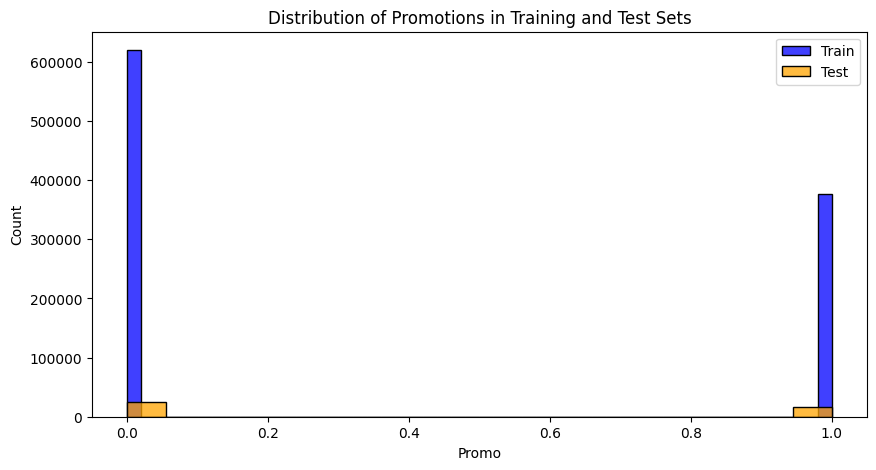

Mean Promo in Train Set: 0.38
Mean Promo in Test Set: 0.40


In [2]:
# Distribution of promotions
logger.info("Visualizing the distribution of promotions in training and test sets.")
plt.figure(figsize=(10, 5))
sns.histplot(train['Promo'], kde=False, color='blue', label='Train')
sns.histplot(test['Promo'], kde=False, color='orange', label='Test')
plt.legend()
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()

# Statistical value: Promo distribution comparison
train_promo_mean = train['Promo'].mean()
test_promo_mean = test['Promo'].mean()
print(f"Mean Promo in Train Set: {train_promo_mean:.2f}")
print(f"Mean Promo in Test Set: {test_promo_mean:.2f}")


2025-01-04 21:42:10,205 - INFO - Analyzing sales behavior around holidays.
/tmp/ipykernel_18684/594308789.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='Date', y='Sales', hue='StateHoliday', ci=None)


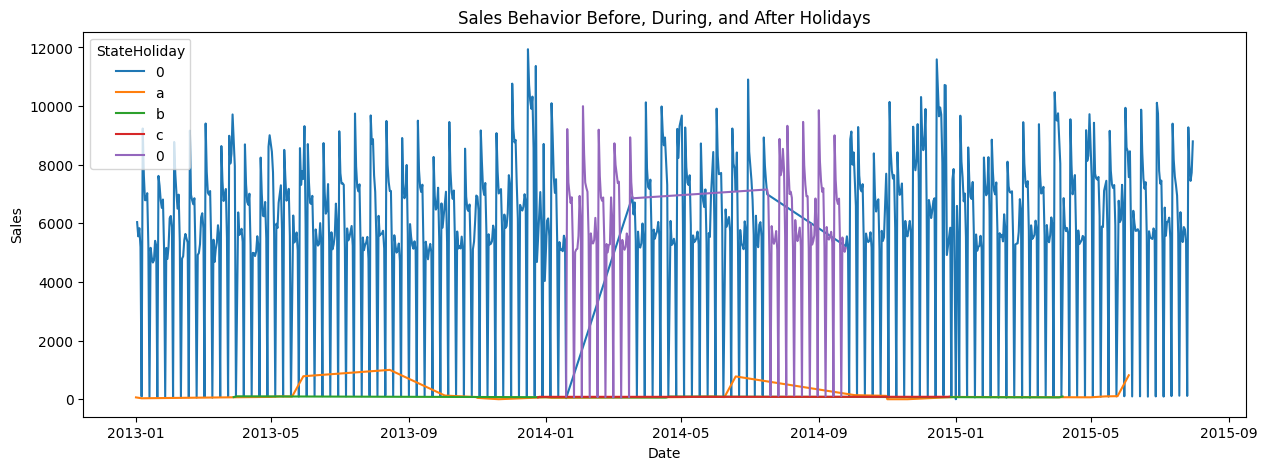

Mean Sales During Holidays: 4499.99
Mean Sales During Non-Holidays: 5749.21


In [3]:
# Sales behavior before, during, and after holidays
logger.info("Analyzing sales behavior around holidays.")
train['Date'] = pd.to_datetime(train['Date'])
train['DayOfWeek'] = train['Date'].dt.dayofweek

# Assuming 'StateHoliday' column exists and indicates holidays
plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Sales', hue='StateHoliday', ci=None)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='StateHoliday')
plt.show()

# Statistical value: Sales during holidays
holiday_sales_mean = train[train['StateHoliday'] != '0']['Sales'].mean()
non_holiday_sales_mean = train[train['StateHoliday'] == '0']['Sales'].mean()
print(f"Mean Sales During Holidays: {holiday_sales_mean:.2f}")
print(f"Mean Sales During Non-Holidays: {non_holiday_sales_mean:.2f}")


2025-01-04 21:49:06,323 - INFO - Analyzing seasonal purchase behaviors.
/tmp/ipykernel_18684/3194755364.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='Month', y='Sales', hue='Year', ci=None, palette='viridis')


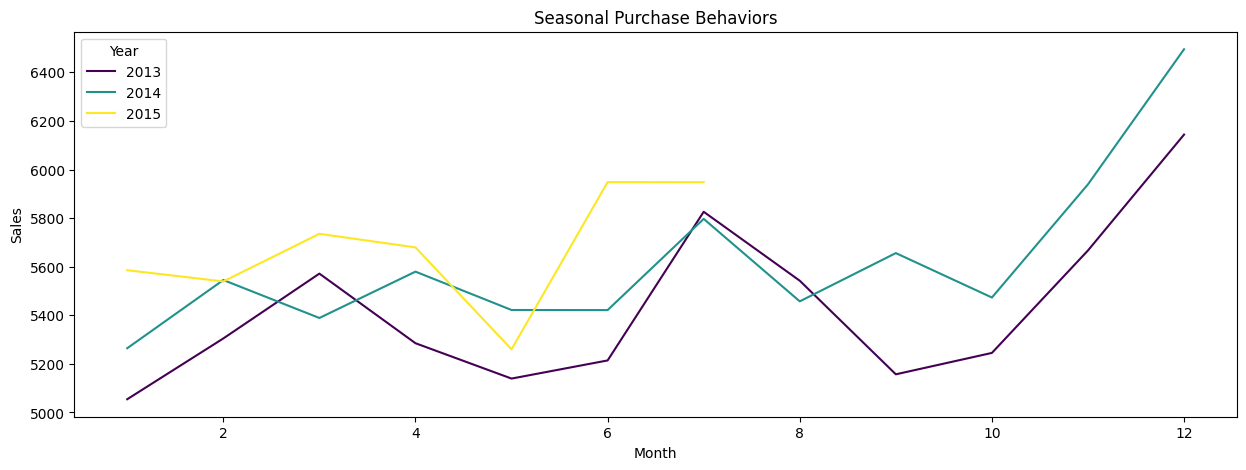

Mean Sales by Month:
    Month        Sales
0       1  5301.483167
1       2  5463.215682
2       3  5565.243746
3       4  5514.630091
4       5  5273.812621
5       6  5527.434403
6       7  5860.408616
7       8  5503.636970
8       9  5384.217519
9      10  5349.125134
10     11  5790.862492
11     12  6304.415916


In [4]:
# Extracting month and year for seasonal analysis
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

# Seasonal purchase behaviors
logger.info("Analyzing seasonal purchase behaviors.")
plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Month', y='Sales', hue='Year', ci=None, palette='viridis')
plt.title('Seasonal Purchase Behaviors')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year', loc='upper left')
plt.show()

# Statistical value: Seasonal sales analysis
monthly_sales_mean = train.groupby('Month')['Sales'].mean().reset_index()
print("Mean Sales by Month:")
print(monthly_sales_mean)


2025-01-04 21:51:51,216 - INFO - Analyzing correlation between sales and number of customers.


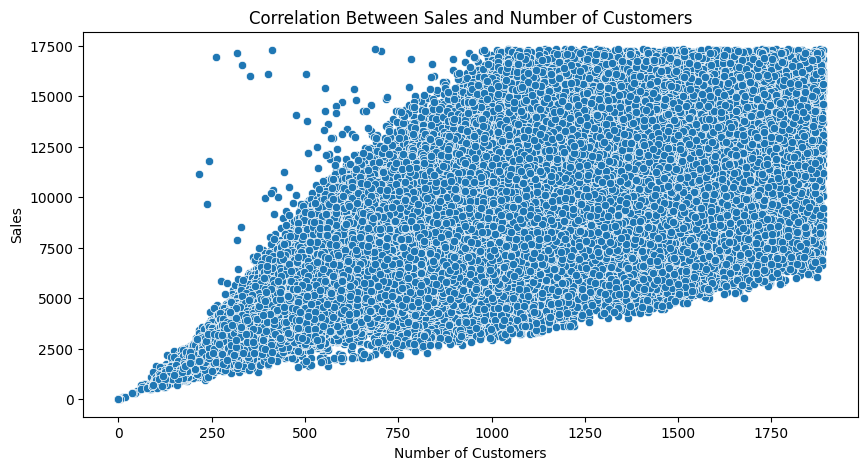

Correlation Coefficient Between Sales and Number of Customers: 0.91


In [5]:
# Correlation between sales and number of customers
logger.info("Analyzing correlation between sales and number of customers.")
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='Customers', y='Sales')
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Statistical value: Correlation coefficient
correlation = train['Sales'].corr(train['Customers'])
print(f"Correlation Coefficient Between Sales and Number of Customers: {correlation:.2f}")


2025-01-04 21:54:15,145 - INFO - Analyzing the effect of promo on sales.
2025-01-04 21:54:15,732 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 21:54:16,139 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


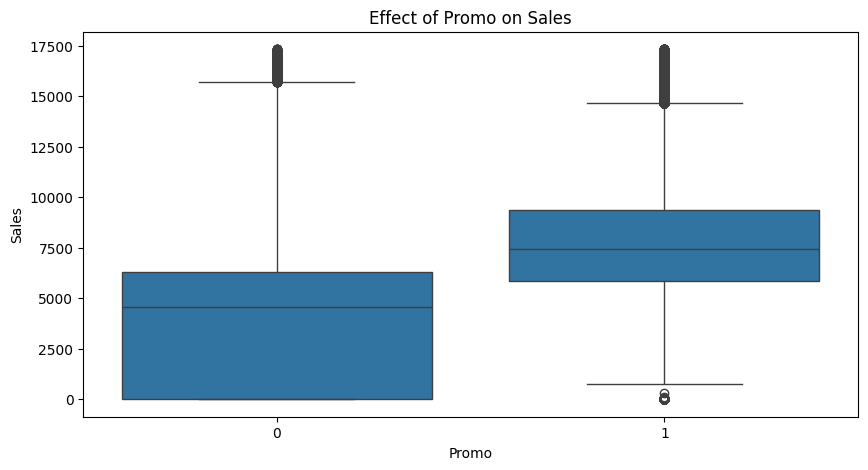

Mean Sales with Promo: 7693.94
Mean Sales without Promo: 4246.16


In [6]:
# Effect of promo on sales
logger.info("Analyzing the effect of promo on sales.")
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='Promo', y='Sales')
plt.title('Effect of Promo on Sales')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# Statistical value: Promo effect on sales
promo_sales_mean = train[train['Promo'] == 1]['Sales'].mean()
non_promo_sales_mean = train[train['Promo'] == 0]['Sales'].mean()
print(f"Mean Sales with Promo: {promo_sales_mean:.2f}")
print(f"Mean Sales without Promo: {non_promo_sales_mean:.2f}")


2025-01-04 21:56:08,471 - INFO - Analyzing trends of customer behavior during store opening and closing times.
/tmp/ipykernel_18684/2967595245.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='DayOfWeek', y='Sales', hue='Open', ci=None, marker='o')


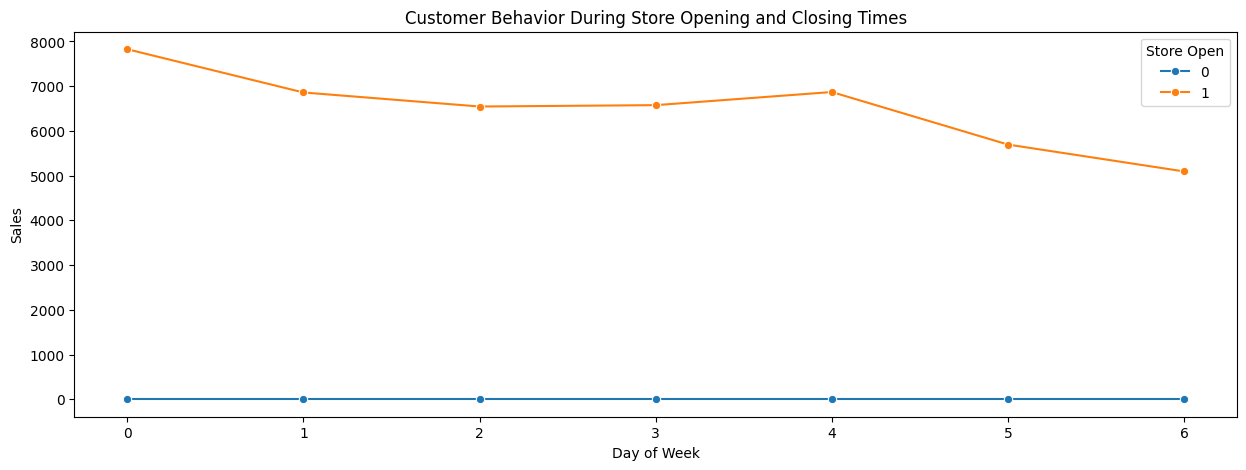

Mean Sales When Store is Open: 6712.90
Mean Sales When Store is Closed: 0.00


In [7]:
# Analyze customer behavior during store opening and closing times
logger.info("Analyzing trends of customer behavior during store opening and closing times.")
plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='DayOfWeek', y='Sales', hue='Open', ci=None, marker='o')
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.legend(title='Store Open')
plt.show()

# Statistical value: Sales when store is open vs closed
open_sales_mean = train[train['Open'] == 1]['Sales'].mean()
closed_sales_mean = train[train['Open'] == 0]['Sales'].mean()
print(f"Mean Sales When Store is Open: {open_sales_mean:.2f}")
print(f"Mean Sales When Store is Closed: {closed_sales_mean:.2f}")


2025-01-04 21:57:57,014 - INFO - Analyzing sales for stores open on all weekdays.
2025-01-04 21:57:57,081 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_18684/3141731681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='DayOfWeek', y='Sales', palette='viridis')
2025-01-04 21:57:57,091 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


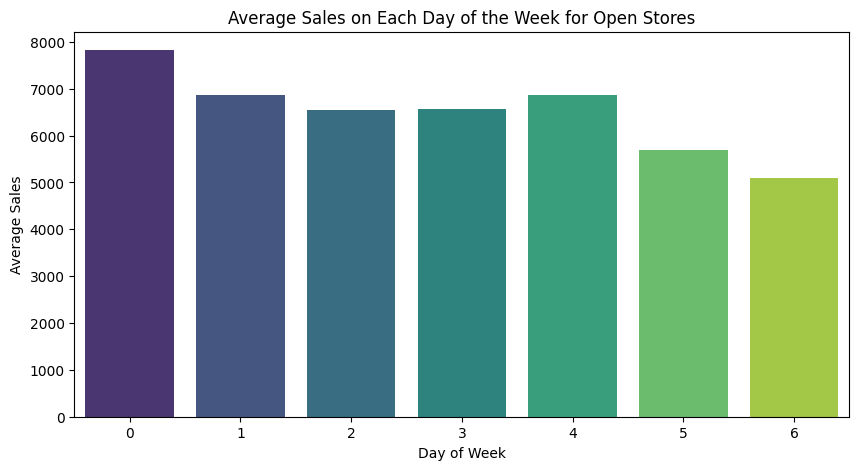

Average Sales by Day of the Week for Open Stores:
   DayOfWeek        Sales
0          0  7826.755140
1          1  6859.764243
2          2  6545.589049
3          3  6576.109275
4          4  6869.667023
5          5  5695.125648
6          6  5093.800637


In [8]:
# Analyze sales for stores open on all weekdays
logger.info("Analyzing sales for stores open on all weekdays.")
weekday_sales = train[train['Open'] == 1].groupby('DayOfWeek')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_sales, x='DayOfWeek', y='Sales', palette='viridis')
plt.title('Average Sales on Each Day of the Week for Open Stores')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()

# Statistical value: Average sales by day of week
print("Average Sales by Day of the Week for Open Stores:")
print(weekday_sales)


2025-01-04 22:10:33,612 - INFO - Loading store data...
2025-01-04 22:10:33,653 - INFO - Store data loaded successfully.
2025-01-04 22:10:33,867 - INFO - Analyzing how the assortment type affects sales.


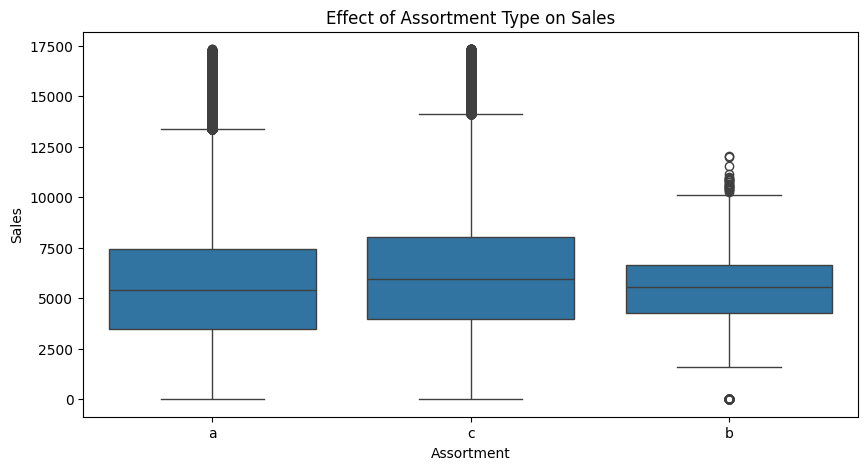

Mean Sales by Assortment Type:
  Assortment        Sales
0          a  5316.145540
1          b  5465.974586
2          c  5817.440090


In [12]:
# Analyze how the assortment type affects sales
# Load store data
logger.info("Loading store data...")
store = pd.read_csv('/home/enat/Downloads/rossmann-store-sales/store.csv')
logger.info("Store data loaded successfully.")

# Merge train and store data on 'Store' column
train_merged = train.merge(store, on='Store', how='left')

# Check if 'Assortment' column exists
if 'Assortment' in train_merged.columns:
    # Analyze how the assortment type affects sales
    logger.info("Analyzing how the assortment type affects sales.")
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_merged, x='Assortment', y='Sales')
    plt.title('Effect of Assortment Type on Sales')
    plt.xlabel('Assortment')
    plt.ylabel('Sales')
    plt.show()

    # Statistical value: Assortment effect on sales
    assortment_sales_mean = train_merged.groupby('Assortment')['Sales'].mean().reset_index()
    print("Mean Sales by Assortment Type:")
    print(assortment_sales_mean)
else:
    logger.warning("The 'Assortment' column does not exist in the train_merged DataFrame.")
    print("The 'Assortment' column does not exist in the train_merged DataFrame.")



2025-01-04 22:10:56,430 - INFO - Analyzing how the distance to the next competitor affects sales.


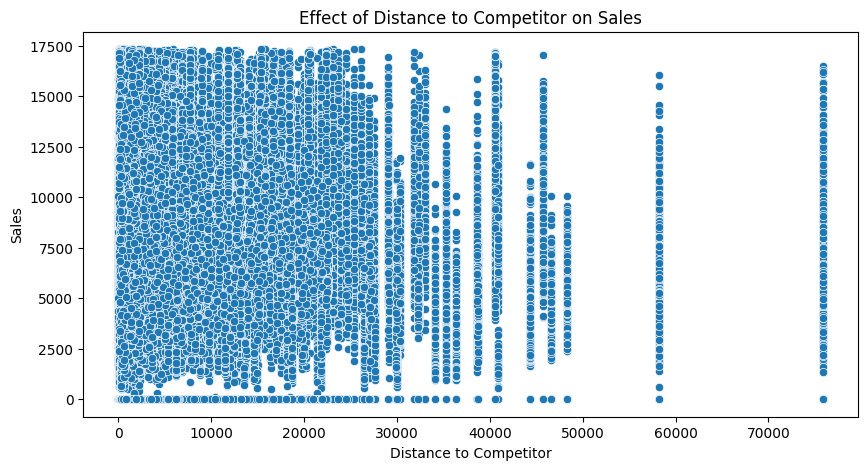

Correlation Coefficient Between Sales and Competition Distance: 0.01


In [13]:
# Check if 'CompetitionDistance' column exists
if 'CompetitionDistance' in train_merged.columns:
    # Analyze how the distance to the next competitor affects sales
    logger.info("Analyzing how the distance to the next competitor affects sales.")
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=train_merged, x='CompetitionDistance', y='Sales')
    plt.title('Effect of Distance to Competitor on Sales')
    plt.xlabel('Distance to Competitor')
    plt.ylabel('Sales')
    plt.show()

    # Statistical value: Correlation between sales and competition distance
    correlation_comp = train_merged['Sales'].corr(train_merged['CompetitionDistance'])
    print(f"Correlation Coefficient Between Sales and Competition Distance: {correlation_comp:.2f}")
else:
    logger.warning("The 'CompetitionDistance' column does not exist in the train_merged DataFrame.")
    print("The 'CompetitionDistance' column does not exist in the train_merged DataFrame.")



In [14]:
# Handle missing values in 'CompetitionOpenSinceYear'
if 'CompetitionOpenSinceYear' in train_merged.columns:
    train_merged['CompetitionOpenSinceYear'] = train_merged['CompetitionOpenSinceYear'].fillna(0).astype(int)

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=train_merged, x='Date', y='Sales', hue='CompetitionOpenSinceYear', ci=None)
    plt.title('Impact of New Competitors on Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(title='Competition Open Since Year')
    plt.show()

    # Statistical value: Average sales by competition open year
    competition_sales_mean = train_merged.groupby('CompetitionOpenSinceYear')['Sales'].mean().reset_index()
    print("Average Sales by Competition Open Since Year:")
    print(competition_sales_mean)
else:
    logger.warning("The 'CompetitionOpenSinceYear' column does not exist in the train_merged DataFrame.")
    print("The 'CompetitionOpenSinceYear' column does not exist in the train_merged DataFrame.")



2025-01-04 22:11:05,493 - INFO - Analyzing the impact of opening or reopening new competitors.


KeyError: 'CompetitionOpenSinceYear'